# Modelos Multimodales con Estructura de Vision Transformer

Un **modelo multimodal** procesa y combina múltiples tipos de datos, como imágenes, texto, y audio, para generar salidas integradas, replicando cómo los humanos interpretan diversas fuentes de información. Los primeros enfoques usaban redes neuronales separadas para cada modalidad, como **CNNs** para imágenes y **RNNs** para texto, combinando sus salidas de forma superficial. El avance llegó con el uso de la **atención** en Transformers, como en **CLIP** y **DALL·E**, que unificaron texto e imágenes en un mismo espacio vectorial.

### Arquitecturas Multimodales (General con o sin estructura ViT):

1. **Fusión Tardía**: Procesa modalidades por separado y luego combina las representaciones al final.
2. **Atención Cruzada**: Modelos como **CLIP** usan atención entre texto e imagen desde el inicio, permitiendo un aprendizaje más profundo.
3. **Vision Transformer (ViT)**: ViT divide imágenes en parches y aplica atención. Se usa en modelos como **DALL·E** para integrar texto e imagen.
4. **Difusión**: **Stable Diffusion** genera imágenes a partir de ruido, guiado por embeddings de texto.
5. **Modelos Complejos**: **ImageBind** y **Perceiver IO** integran texto, imagen, audio y sensores, procesando simultáneamente varias modalidades.


# Modelos Multimodales con Estructura de Vision Transformer


1. **[CLIP (Contrastive Language-Image Pretraining)](https://huggingface.co/docs/transformers/model_doc/clip)**
   - **Uso de ViT**: CLIP utiliza ViT-B/32 o ViT-L/14 para procesar imágenes. Proyecta imágenes y texto en un espacio latente común para medir la similitud entre ellos.
   - **Aplicación**: Búsqueda de imágenes basada en texto y viceversa, así como tareas de comprensión visual y lingüística conjunta.

2. **[DALL·E](https://cdn.openai.com/papers/dall-e-3.pdf)**
   - **Uso de ViT**: ViT se emplea para representar imágenes que luego son utilizadas en el proceso de generación de nuevas imágenes a partir de descripciones textuales.
   - **Aplicación**: Generación de imágenes a partir de texto, con alta calidad y coherencia visual.

3. **[FLAVA (Foundational Language and Vision AI)](https://flava-model.github.io/)**
   - **Uso de ViT**: Utiliza ViT como parte de su arquitectura para procesar imágenes junto con texto en una red unificada.
   - **Aplicación**: Tareas conjuntas de visión y lenguaje, como razonamiento visual y reconocimiento de relaciones entre texto e imágenes.

4. **[ImageBind](https://github.com/facebookresearch/ImageBind/blob/main/model_card.md)**
   - **Uso de ViT**: Emplea ViT para procesar imágenes dentro de su arquitectura multimodal, combinando texto, imagen, audio y otros tipos de datos.
   - **Aplicación**: Integración de múltiples modalidades en un espacio compartido para tareas complejas como la fusión de información de diferentes fuentes.





C:\Users\MaxiT\.conda\envs\pytorch\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Un Gato: 0.0000
Dos Gatos: 0.0000
Perro: 0.0001
Un mapache natural: 0.2324
Un mapache azul: 0.0931
Mapache roba objeto brillante: 0.0125
Mapache sube árbol alto: 0.0070
Mapache lava comida cuidadosamente: 0.0018
Mapache se esconde en la basura: 0.0116
Mapache se cuela en el ático: 0.1782
Mapache abre la tapa del frasco: 0.1040
Mapache busca comida de noche: 0.0114
Mapache juega con hojas: 0.0028
Mapache olfatea en busca de peligro: 0.0165
Mapache se acurruca para dormir: 0.0001
Mapache levanta las patas: 0.3284
La etiqueta predicha es: Mapache levanta las patas


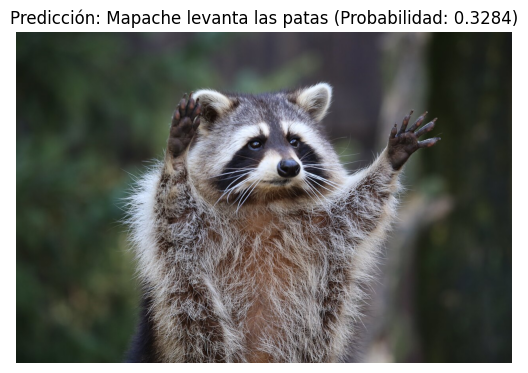

In [1]:
import matplotlib.pyplot as plt

from PIL import Image
import requests

from transformers import CLIPProcessor, CLIPModel

#https://huggingface.co/openai/clip-vit-large-patch14

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")

#url = "http://images.cocodataset.org/val2017/000000039769.jpg"
path  = "./raccoon.jpg"
image = Image.open(path)

inputs = processor(text=["a photo of one cat", 
                         "a photo of two cats", 
                         "a photo of a dog", 
                         "a photo of natural raccoon", 
                         "a photo of blue raccoon", 
                         "Raccoon steals shiny object",
                         "Raccoon climbs tall tree", 
                         "Raccoon washes food carefully", 
                         "Raccoon hides in trash", 
                         "Raccoon sneaks into attic", 
                         "Raccoon opens jar lid", 
                         "Raccoon scavenges at night", 
                         "Raccoon plays with leaves", 
                         "Raccoon sniffs for danger", 
                         "Raccoon curls up sleeping", 
                         "Raccoon lifts paws"
                         ], images=image, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image # image-text similarity score
probs = logits_per_image.softmax(dim=1) # softmax to get the label probabilities


# Imprimimos las probabilidades
labels = ["Un Gato",
          "Dos Gatos", 
          "Perro", 
          "Un mapache natural", 
          "Un mapache azul",
          "Mapache roba objeto brillante",
         "Mapache sube árbol alto", 
         "Mapache lava comida cuidadosamente", 
         "Mapache se esconde en la basura", 
         "Mapache se cuela en el ático", 
         "Mapache abre la tapa del frasco", 
         "Mapache busca comida de noche", 
         "Mapache juega con hojas", 
         "Mapache olfatea en busca de peligro", 
         "Mapache se acurruca para dormir", 
         "Mapache levanta las patas"
          ]
for label, prob in zip(labels, probs[0]):
    print(f"{label}: {prob:.4f}")

# Se obtiene la etiqueta predicha
predicted_index = probs.argmax().item()
predicted_label = labels[predicted_index]

print(f"La etiqueta predicha es: {predicted_label}")


plt.imshow(image)
plt.title(f"Predicción: {predicted_label} (Probabilidad: {probs[0][predicted_index]:.4f})")
plt.axis('off')
plt.show()


# Tarea: Evaluación de Modelos Multimodales con Vision Transformer

1. **Objetivo**:  
   Investigar y seleccionar diferentes modelos preentrenados que utilicen Vision Transformers (ViTs). Ejecutar estos modelos sobre la misma imagen o texto y comparar su desempeño para determinar cuál proporciona mejores resultados.

2. **Pasos a seguir**:
   - **Selección de Modelos**: Identificar y seleccionar varios modelos preentrenados basados en ViTs que sean adecuados para la tarea.
   - **Conjunto de Datos**: Elegir un conjunto de datos que contenga imágenes o textos pertinentes para la evaluación.
   - **Implementación**: Realizar la implementación de cada modelo, asegurando que todos se ejecuten sobre las mismas entradas (imagen o texto).
   - **Evaluación**: Comparar el desempeño de los modelos utilizando métricas relevantes, como precisión, recall y F1-score.
   - **Análisis de Resultados**: Documentar y analizar los resultados obtenidos para identificar el modelo más efectivo.

3. **Conclusiones**:  
   Al finalizar el proceso, sintetizar las conclusiones sobre el desempeño de los modelos evaluados y las implicaciones de los resultados en el contexto de aplicaciones multimodales.


   Ayuda: Dentro de este [Catalogo](https://huggingface.co/models?sort=trending), puede seleccionar la opción de modelos multimodales y ordenar por "mas descargado"

### Selección de Modelos

En este trabajo, se investigará acerca de modelos ViT para segmentación de imágenes basadas en texto. El objetivo es identificar diferentes partes de la imágen realizando una segmentación, a partir del texto introducido. Como modelos se probarán los siguientes (obtenidos de HuggingFace):

- CLIPSeg-rd64-refined: modelo reducido y refinado de CLIPSeg del paper [Image Segmentation Using Text and Image Prompts](Ihttps://arxiv.org/abs/2112.10003).
- CLIPSeg-rd16: modelo aún más reducido de CLIPSeg.
- PaliGemma + VAE: ver  https://huggingface.co/spaces/big-vision/paligemma-hf/blob/main/app.py

### Conjunto de datos

Como conjunto de datos se utilizó [PhraseCutDataset](https://github.com/ChenyunWu/PhraseCutDataset) que contiene unas 77.262 imágenes junto a 345.486 pares frase/región. En este trabajo se usa el subset de test que contiene 2.545 imágenes y 14.354 pares frase/región.

### Implementación

#### Dataset

In [69]:
from dataset.download_dataset import download_images, download_annotations
from dataset.utils.refvg_loader import RefVGLoader
from dataset.utils.visualize_utils import plot_refvg
%matplotlib inline

In [3]:
dataset_split = 'test'
dataset_image_path = './dataset/data/VGPhraseCut_v0/images/'

In [4]:
refvg_loader = RefVGLoader(split=dataset_split)

PhraseHandler loading nar_count: E:\MaxiT\Documentos\Estudios\MIA\Bimestre2\VPC3\repo_maxi\tp4\dataset\data\VGPhraseCut_v0\name_att_rel_count.json
Number of categories: 1272 / 3103, frequency thresh: 21 (excluding [INV] [UNK])
Number of attributes: 593 / 12143, frequency thresh: 21 (excluding [INV] [UNK])
Number of relationships: 126 / 3110, frequency thresh: 21 (excluding [INV] [UNK])
RefVGLoader loading img_info: E:\MaxiT\Documentos\Estudios\MIA\Bimestre2\VPC3\repo_maxi\tp4\dataset\data\VGPhraseCut_v0\image_data_split.json
RefVGLoader loading refer data
RefVGLoader loading E:\MaxiT\Documentos\Estudios\MIA\Bimestre2\VPC3\repo_maxi\tp4\dataset\data\VGPhraseCut_v0\refer_test.json
RefVGLoader preparing data
split test: 2545 imgs, 14354 tasks
RefVGLoader ready.


dict_keys(['image_id', 'width', 'height', 'split', 'task_ids', 'phrases', 'p_structures', 'img_ins_boxes', 'img_ins_Polygons', 'img_ins_cats', 'img_ins_atts', 'gt_Polygons', 'gt_boxes', 'bounds'])


C:\Users\MaxiT\AppData\Local\Temp\ipykernel_18284\468369545.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


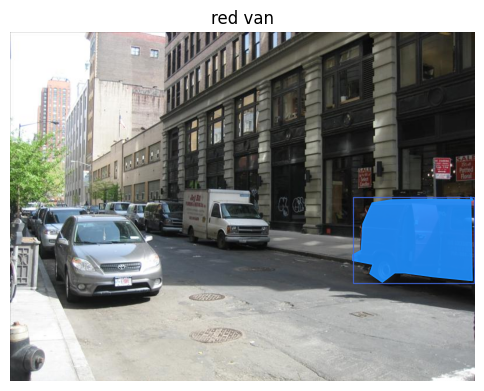

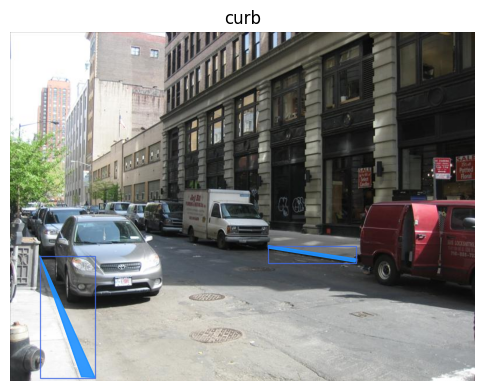

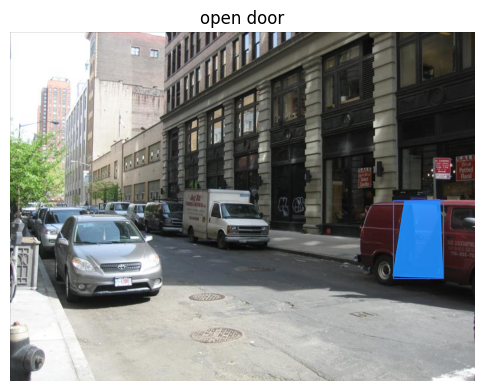

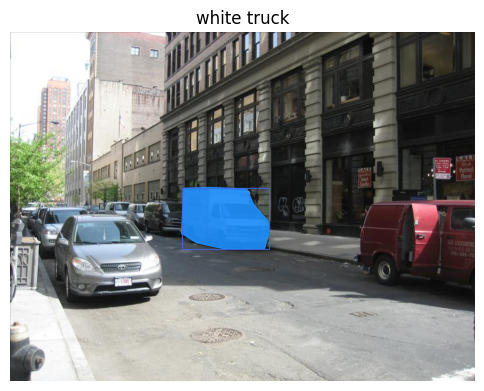

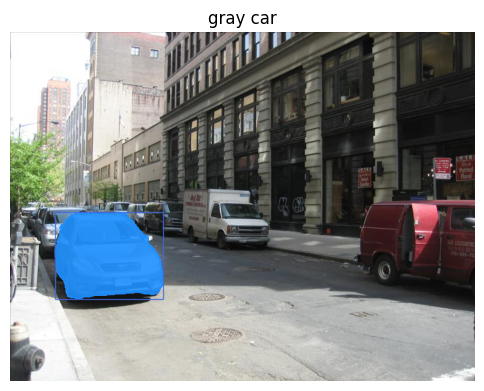

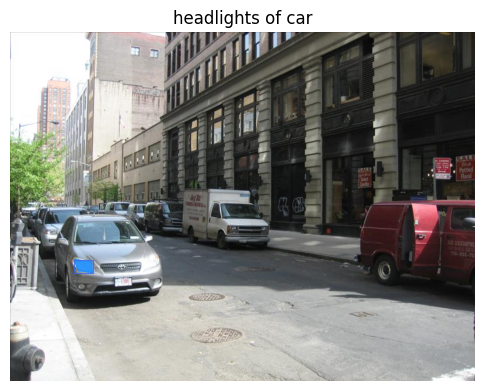

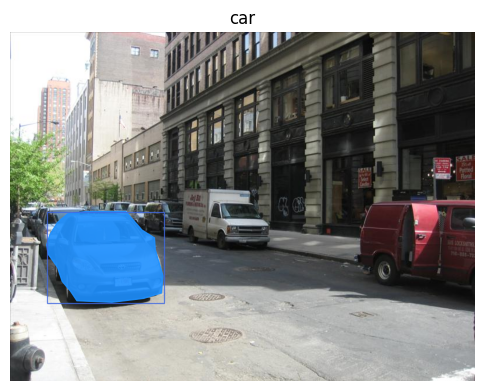

In [5]:
# Test data
img_ref_data = refvg_loader.get_img_ref_data()
print(img_ref_data.keys())

img_id = img_ref_data['image_id']
fig_size = (img_ref_data['height'] / 100.0, img_ref_data['width'] / 100.0)

for task_i, task_id in enumerate(img_ref_data['task_ids']):
    phrase = img_ref_data['phrases'][task_i]
    gt_boxes = img_ref_data['gt_boxes'][task_i]
    gt_Polygons = img_ref_data['gt_Polygons'][task_i]
    fig = plot_refvg(fig_size=fig_size, font_size=12, img_id=img_id, title=phrase, 
                     gt_Polygons=gt_Polygons, gt_boxes=gt_boxes, gray_img=False)
    fig.show()

#### Modelos

In [98]:
from transformers import AutoProcessor, CLIPSegForImageSegmentation
from PIL import Image
import torch
from abc import ABC, abstractmethod

In [127]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

In [124]:
class ClipSegSegmentationModel(ABC):

    def __init__(self, processor, model, prediction_path, model_name):
        self.processor = processor
        self.model = model.to(device)
        self.prediction_path = prediction_path
        self.model_name = model_name

    def model_predict(self, image, prompts):
        width, height = image.size
        model_inputs = self.processor(text=prompts, images=[image] * len(prompts), padding=True, return_tensors="pt").to(device)
        with torch.no_grad():
          outputs = self.model(**model_inputs)
        mask = (torch.sigmoid(Resize((height,width)).forward(outputs.logits.cpu().unsqueeze(1)))>=0.5)*1
        return mask

    def predict(self, dataloader, image_path):
        for id in tqdm(range(len(dataloader.img_ids))):
            image_id = dataloader.img_ids[id]
            img_ref_data = dataloader.get_img_ref_data(image_id)
            task_ids = img_ref_data['task_ids']
            image = Image.open(image_path+str(image_id)+'.jpg').convert("RGB")
            prompts = img_ref_data['phrases']
            predictions = self.model_predict(image, prompts)
            for i in range(predictions.shape[0]):
                mask = predictions[i][0]
                save_pred_to_png(mask, self.prediction_path + str(task_ids[i]) + '.png')

    def evaluate(self, dataset_split):
        evaluate_from_pred_folder(pred_folder = self.prediction_path, refvg_split=dataset_split, analyze_subset=1, 
                                  exp_name_in_summary=self.model_name, save_result_to_path=self.prediction_path, verbose=True)

    def visualize(self, image, prompts):
        mask = self.model_predict(image, prompts)
        _, ax = plt.subplots(1, len(prompts)+1, figsize=(15, 4))
        [a.axis('off') for a in ax.flatten()]
        ax[0].imshow(image)
        [ax[i+1].imshow(mask[i][0]) for i in range(len(prompts))];
        [ax[i+1].text(0, -15, prompts[i]) for i in range(len(prompts))];
        , image, prompts):

In [113]:
clipseg_rd64_predictions_path = './predictions/clipseg_rd64/'
processor_rd64 = AutoProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model_rd64 = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined")
clipseg_model_rd64 = ClipSegSegmentationModel(processor_rd64, model_rd64, clipseg_rd64_predictions_path, 'clipseg_rd64')

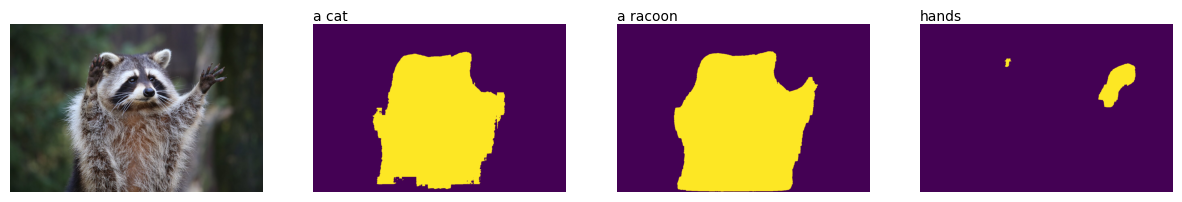

In [114]:
# Test model
path  = "./raccoon.jpg"
image = Image.open(path)
texts = ["a cat", "a racoon", "hands"]
clipseg_model_rd64.visualize(image, texts)

In [128]:
clipseg_rd16_predictions_path = './predictions/clipseg_rd16/'
processor_rd16 = AutoProcessor.from_pretrained("CIDAS/clipseg-rd16")
model_rd16 = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd16")
clipseg_model_rd16 = ClipSegSegmentationModel(processor_rd16, model_rd16, clipseg_rd16_predictions_path, 'clipseg_rd16')

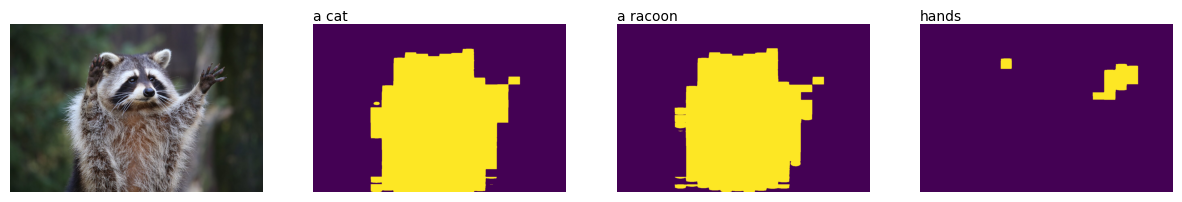

In [129]:
# Test model
path  = "./raccoon.jpg"
image = Image.open(path)
texts = ["a cat", "a racoon", "hands"]
clipseg_model_rd16.visualize(image, texts)

#### Predicciones

In [91]:
from tqdm import tqdm
from dataset.utils.visualize_utils import save_pred_to_png
from dataset.evaluate import evaluate_from_pred_folder
from torchvision.transforms import Resize

In [95]:
clipseg_model_rd64.predict(refvg_loader, dataset_image_path)

100%|███████████████████████████████████████████████████████████████████████████| 2545/2545 [14:10:23<00:00, 20.05s/it]


In [130]:
clipseg_model_rd16.predict(refvg_loader, dataset_image_path)

100%|███████████████████████████████████████████████████████████████████████████| 2545/2545 [13:00:06<00:00, 18.39s/it]


#### Evaluación

In [131]:
clipseg_model_rd64.evaluate(dataset_split)

clipseg_rd64
PhraseHandler loading nar_count: E:\MaxiT\Documentos\Estudios\MIA\Bimestre2\VPC3\repo_maxi\tp4\dataset\data\VGPhraseCut_v0\name_att_rel_count.json
Number of categories: 1272 / 3103, frequency thresh: 21 (excluding [INV] [UNK])
Number of attributes: 593 / 12143, frequency thresh: 21 (excluding [INV] [UNK])
Number of relationships: 126 / 3110, frequency thresh: 21 (excluding [INV] [UNK])
RefVGLoader loading img_info: E:\MaxiT\Documentos\Estudios\MIA\Bimestre2\VPC3\repo_maxi\tp4\dataset\data\VGPhraseCut_v0\image_data_split.json
RefVGLoader loading refer data
RefVGLoader loading E:\MaxiT\Documentos\Estudios\MIA\Bimestre2\VPC3\repo_maxi\tp4\dataset\data\VGPhraseCut_v0\refer_test.json
RefVGLoader preparing data
split test: 2545 imgs, 14354 tasks
RefVGLoader ready.
img|task [1|3] 3 phrases. mean_mask_iou 0.478; 
img|task [2|15] 12 phrases. mean_mask_iou 0.270; 
img|task [3|21] 6 phrases. mean_mask_iou 0.351; 
img|task [4|36] 15 phrases. mean_mask_iou 0.392; 
img|task [5|40] 4 phr

In [132]:
clipseg_model_rd16.evaluate(dataset_split)

clipseg_rd16
PhraseHandler loading nar_count: E:\MaxiT\Documentos\Estudios\MIA\Bimestre2\VPC3\repo_maxi\tp4\dataset\data\VGPhraseCut_v0\name_att_rel_count.json
Number of categories: 1272 / 3103, frequency thresh: 21 (excluding [INV] [UNK])
Number of attributes: 593 / 12143, frequency thresh: 21 (excluding [INV] [UNK])
Number of relationships: 126 / 3110, frequency thresh: 21 (excluding [INV] [UNK])
RefVGLoader loading img_info: E:\MaxiT\Documentos\Estudios\MIA\Bimestre2\VPC3\repo_maxi\tp4\dataset\data\VGPhraseCut_v0\image_data_split.json
RefVGLoader loading refer data
RefVGLoader loading E:\MaxiT\Documentos\Estudios\MIA\Bimestre2\VPC3\repo_maxi\tp4\dataset\data\VGPhraseCut_v0\refer_test.json
RefVGLoader preparing data
split test: 2545 imgs, 14354 tasks
RefVGLoader ready.
img|task [1|3] 3 phrases. mean_mask_iou 0.202; 
img|task [2|15] 12 phrases. mean_mask_iou 0.117; 
img|task [3|21] 6 phrases. mean_mask_iou 0.192; 
img|task [4|36] 15 phrases. mean_mask_iou 0.251; 
img|task [5|40] 4 phr